In [ ]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from Wind.Config import wind_data, wind_data_ext, wind_path
import statsmodels.api as sm
from __future__ import division
%matplotlib inline

/usr/lib64/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
nc_fid = Dataset("/home/bejar/storage/Data/Wind/files/0/0.nc", 'r')

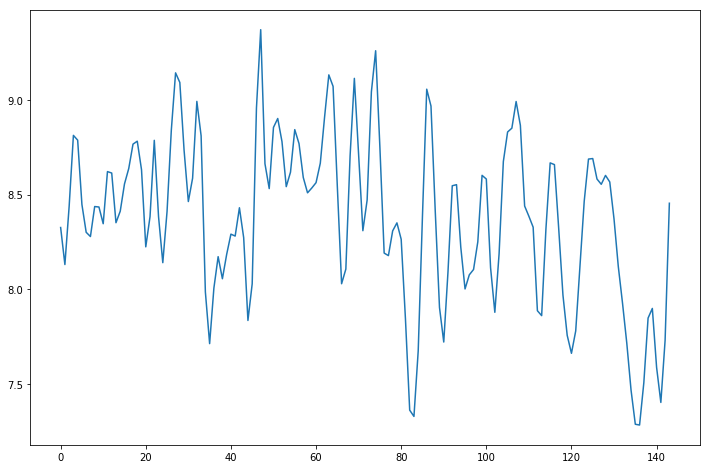

In [32]:
tseries = nc_fid.variables['wind_speed'][144:288]
fig = plt.figure(figsize=(12,8))
plt.plot(tseries)

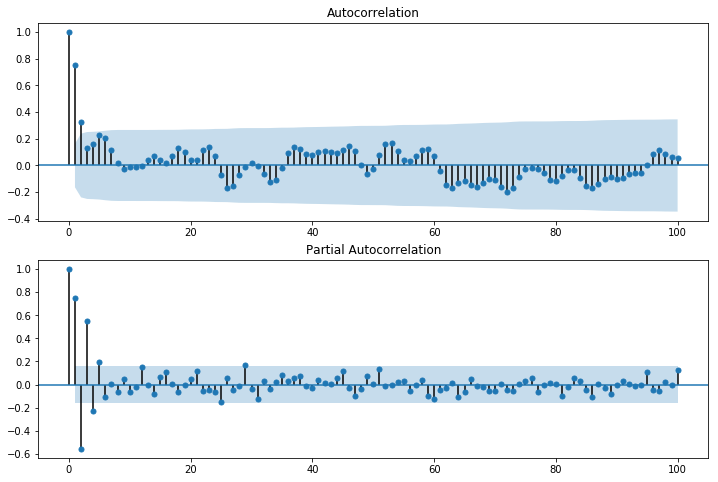

In [33]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tseries, lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tseries, lags=100, ax=ax2)

In [34]:
arima_mod = sm.tsa.AR(tseries).fit(maxlag=100)
estord = sm.tsa.AR(tseries).select_order(maxlag=40, ic='aic')
print(estord)

6


In [35]:
arma_mod=sm.tsa.ARMA(tseries, (5,1)).fit()

In [36]:
print arma_mod.aic, arma_mod.bic, arma_mod.hqic
arma_mod.summary()

-82.4604112164 -58.7019048198 -72.8062948336


<table class="simpletable">
<caption>ARMA Model Results</caption>
<tr>
  <th>Dep. Variable:</th>         <td>y</td>        <th>  No. Observations:  </th>   <td>144</td>  
</tr>
<tr>
  <th>Model:</th>            <td>ARMA(5, 1)</td>    <th>  Log Likelihood     </th> <td>49.230</td> 
</tr>
<tr>
  <th>Method:</th>             <td>css-mle</td>     <th>  S.D. of innovations</th>  <td>0.169</td> 
</tr>
<tr>
  <th>Date:</th>          <td>Fri, 30 Jun 2017</td> <th>  AIC                </th> <td>-82.460</td>
</tr>
<tr>
  <th>Time:</th>              <td>07:08:41</td>     <th>  BIC                </th> <td>-58.702</td>
</tr>
<tr>
  <th>Sample:</th>                <td>0</td>        <th>  HQIC               </th> <td>-72.806</td>
</tr>
<tr>
  <th></th>                       <td> </td>        <th>                     </th>    <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
     <td></td>        <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>const</th>   <td>    8.3868</td> <td>    0.083</td> <td>  101.332</td> <td> 0.000</td> <td>    8.225</td> <td>    8.549</td>
</tr>
<tr>
  <th>ar.L1.y</th> <td>    1.0959</td> <td>    0.114</td> <td>    9.610</td> <td> 0.000</td> <td>    0.872</td> <td>    1.319</td>
</tr>
<tr>
  <th>ar.L2.y</th> <td>   -0.7790</td> <td>    0.192</td> <td>   -4.060</td> <td> 0.000</td> <td>   -1.155</td> <td>   -0.403</td>
</tr>
<tr>
  <th>ar.L3.y</th> <td>    0.3658</td> <td>    0.211</td> <td>    1.738</td> <td> 0.084</td> <td>   -0.047</td> <td>    0.778</td>
</tr>
<tr>
  <th>ar.L4.y</th> <td>   -0.0599</td> <td>    0.173</td> <td>   -0.346</td> <td> 0.730</td> <td>   -0.399</td> <td>    0.279</td>
</tr>
<tr>
  <th>ar.L5.y</th> <td>    0.0798</td> <td>    0.098</td> <td>    0.814</td> <td> 0.417</td> <td>   -0.112</td> <td>    0.272</td>
</tr>
<tr>
  <th>ma.L1.y</th> <td>    0.7802</td> <td>    0.082</td> <td>    9.567</td> <td> 0.000</td> <td>    0.620</td> <td>    0.940</td>
</tr>
</table>
<table class="simpletable">
<caption>Roots</caption>
<tr>
    <td></td>   <th>           Real</th> <th>         Imaginary</th> <th>         Modulus</th> <th>        Frequency</th>
</tr>
<tr>
  <th>AR.1</th>               1.2752                    -0.0000j                    1.2752                   -0.0000     
</tr>
<tr>
  <th>AR.2</th>               0.5753                    -1.2285j                    1.3565                   -0.1803     
</tr>
<tr>
  <th>AR.3</th>               0.5753                    +1.2285j                    1.3565                    0.1803     
</tr>
<tr>
  <th>AR.4</th>              -0.8376                    -2.1543j                    2.3114                   -0.3090     
</tr>
<tr>
  <th>AR.5</th>              -0.8376                    +2.1543j                    2.3114                    0.3090     
</tr>
<tr>
  <th>MA.1</th>              -1.2818                    +0.0000j                    1.2818                    0.5000     
</tr>
</table>

In [37]:
print arima_mod.aic, arima_mod.bic, arima_mod.hqic
arima_mod.summary()

-52.6358645045 -48.499788535 -51.1020081414


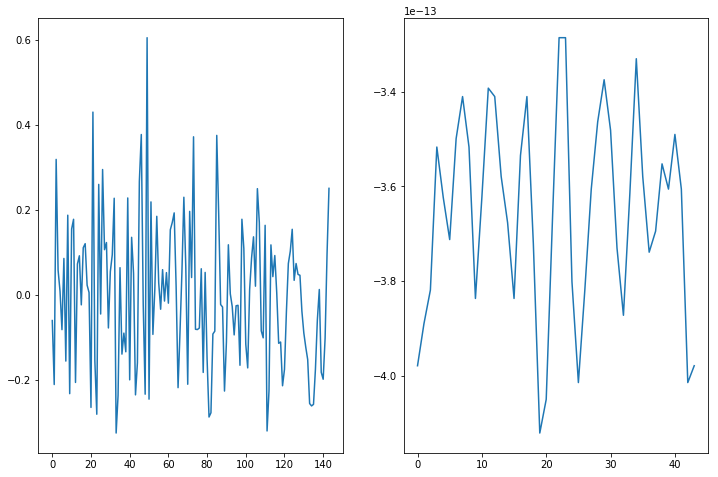

In [38]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121)
plt.plot(arma_mod.resid)
ax = fig.add_subplot(122)
plt.plot(arima_mod.resid)

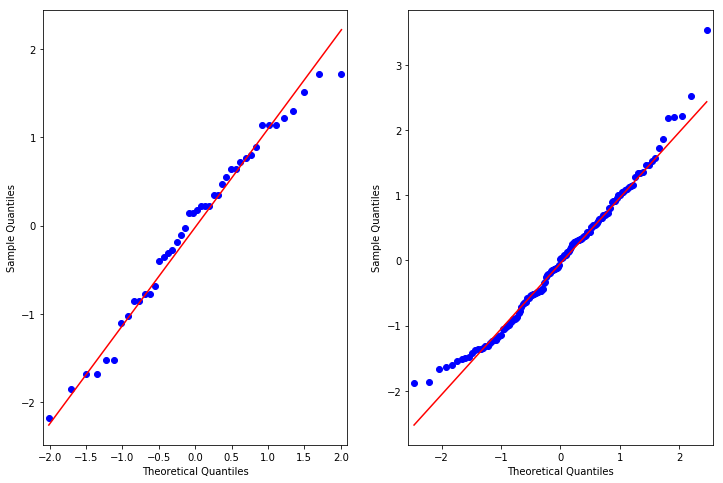

In [39]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121)
fig = sm.qqplot(arima_mod.resid, line='q', ax=ax, fit=True)
ax = fig.add_subplot(122)
fig = sm.qqplot(arma_mod.resid, line='q', ax=ax, fit=True)

ValueError: operands could not be broadcast together with shapes (99,) (42,) (99,) 

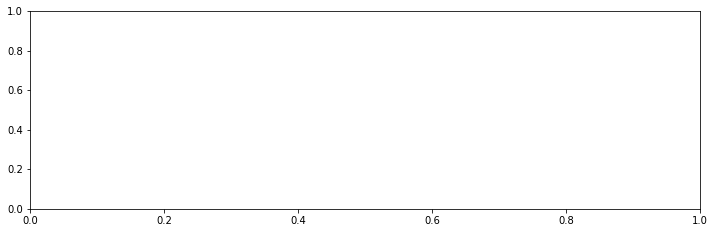

In [40]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_mod.resid, lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_mod.resid, lags=100, ax=ax2)